In [7]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

R=800       #l'integrale di Fourier è calcolato su [-R,R]. R va quindi scelto opportunamente grande;
N=2*R*50    #per il calcolo dell'integrale, ogni intervallo [i, i+1] è suddiviso in N/2R intervallini;
x0=0        #il grafico di f(x) e di g(k) viene mostrato sull'intervallo [x0-a, x0+a];
a=6
n=5000      #il campionamento di f e g avviene suddividendo l'intervallo [x0-a, x0+a] in n intervallini.
e=np.exp

f = lambda x: np.cos(5*x)
    
def g(f,k):
    A=0
    dx=2*R/N
    for i in range(N):
        dA = dx/2 * (f(-R+i*dx)*e(-1j*k*(-R+i*dx)) + f(-R+(i+1)*dx)*e(-1j*k*(-R+(i+1)*dx)))
        A+=dA
    return A/np.sqrt(2*np.pi)

def h(f,x):
    A=0
    dk=2*R/N
    for i in range(N):
        dA = dk/2 * (f(-R+i*dk)*e(1j*x*(-R+i*dk)) + f(-R+(i+1)*dk)*e(-1j*x*(-R+(i+1)*dk)))
        A+=dA
    return A/np.sqrt(2*np.pi)

t=time()
X=np.linspace(x0-a,x0+a,n)
Y=np.empty(n,complex)
for i in range(n):
    Y[i]=f(X[i])

G=g(f,X)
H=h(f,X)
t=time()-t

Tempo di esecuzione: 141.343 s.



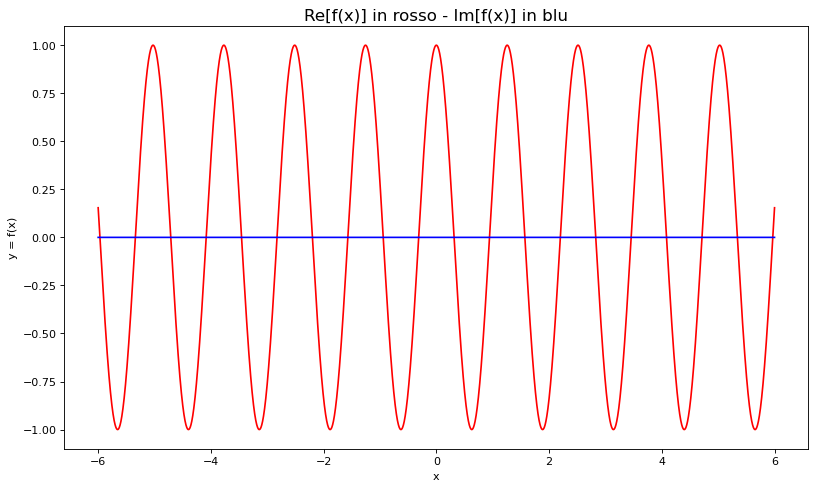

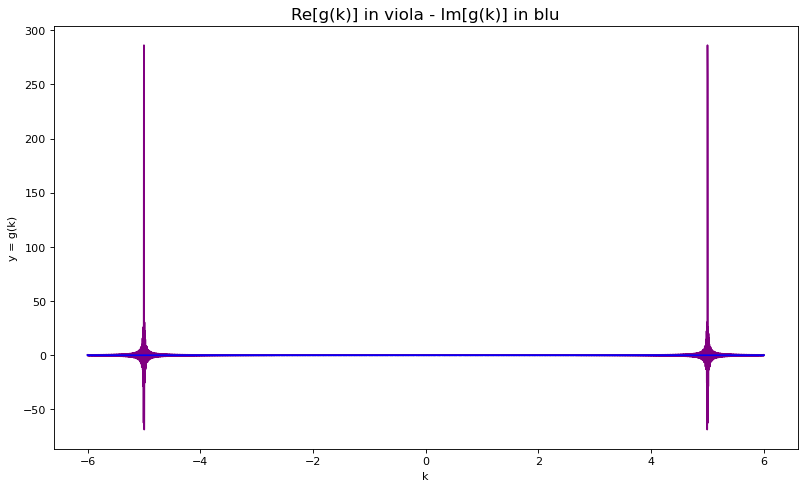

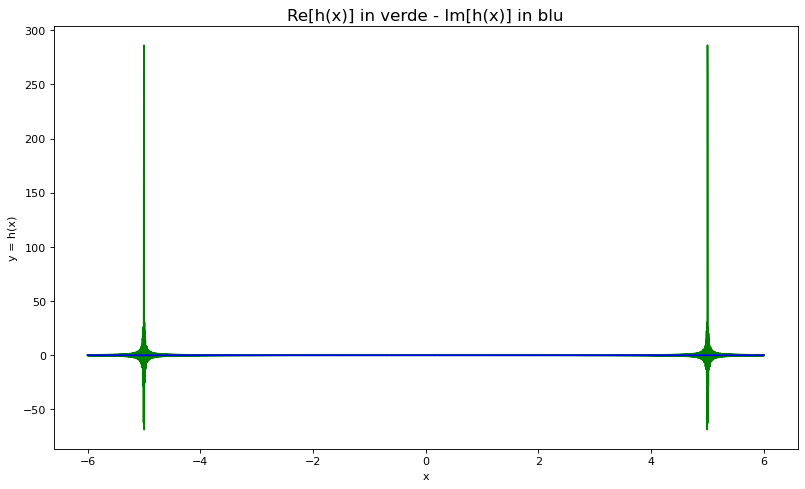

In [14]:
print('Tempo di esecuzione:',round(t,3),'s.\n')

plt.figure(figsize=(12,7),dpi=80)
plt.plot(X,np.real(Y),'red')
plt.plot(X,np.imag(Y),'blue')
plt.title('Re[f(x)] in rosso - Im[f(x)] in blu',size=15)
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.show()

plt.figure(figsize=(12,7),dpi=80)
plt.plot(X,np.real(G),'purple')
plt.plot(X,np.imag(G),'blue',)
plt.title('Re[g(k)] in viola - Im[g(k)] in blu',size=15)
plt.xlabel('k')
plt.ylabel('y = g(k)')
plt.show()

plt.figure(figsize=(12,7),dpi=80)
plt.plot(X,np.real(H),'green')
plt.plot(X,np.imag(H),'blue')
plt.title('Re[h(x)] in verde - Im[h(x)] in blu',size=15)
plt.xlabel('x')
plt.ylabel('y = h(x)')
plt.show()